In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import cm
plt.style.use('ggplot')
# Ideal para mostrar información más bonita :)
from IPython.display import display

dataset = pd.read_csv("data3.csv", encoding = 'utf8', sep=";")

In [2]:
df = dataset.groupby(["show", "score"]).count()
print(df.info())

# Since we need to count, we can delete one column and rename the only one to count.
del df['name_chapter']
df.columns = ["count"]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78 entries, (Breaking Bad, 7.8) to (The Wire, 9.2)
Data columns (total 2 columns):
chapter         78 non-null int64
name_chapter    78 non-null int64
dtypes: int64(2)
memory usage: 1.8+ KB
None


In [3]:
#Now normalize each serie
shows = list(set(map(lambda x: x[0], df.index)))

df["distribution"] = df['count'] / dataset.groupby("show").count()['chapter']
x_min = df.index.min()[1]

In [4]:
display(df)

count  distribution
show            score                     
Breaking Bad    7.8        1      0.016129
                8.1        1      0.016129
                8.3        4      0.064516
                8.4        3      0.048387
                8.5        4      0.064516
                8.6        2      0.032258
                8.7        8      0.129032
                8.8        2      0.032258
                8.9        7      0.112903
                9.0        2      0.032258
                9.1        3      0.048387
                9.2        7      0.112903
                9.3        2      0.032258
                9.4        2      0.032258
                9.5        2      0.032258
                9.6        8      0.129032
                9.8        1      0.016129
                9.9        2      0.032258
                10.0       1      0.016129
Game of Thrones 8.0        1      0.016667
                8.3        1      0.016667
                8.4        1      0.016667
                8.5        3      0.050000
                8.6        4      0.066667
                8.7        5      0.083333
                8.8       11      0.183333
                8.9        4      0.066667
                9.0        6      0.100000
                9.1        4      0.066667
                9.2        3      0.050000
...                      ...           ...
Rick and Morty  9.6        1      0.045455
                9.8        1      0.045455
The Sopranos    8.0        1      0.011628
                8.1        1      0.011628
                8.2        6      0.069767
                8.3        4      0.046512
                8.4        9      0.104651
                8.5        6      0.069767
                8.6       11      0.127907
                8.7       22      0.255814
                8.8        6      0.069767
                8.9        6      0.069767
                9.0        6      0.069767
                9.1        4      0.046512
                9.2        1      0.011628
                9.4        2      0.023256
                9.6        1      0.011628
The Wire        7.9        1      0.016667
                8.0        1      0.016667
                8.1        3      0.050000
                8.2        3      0.050000
                8.3        3      0.050000
                8.4        6      0.100000
                8.5       31      0.516667
                8.6        2      0.033333
                8.7        2      0.033333
                8.8        1      0.016667
                8.9        3      0.050000
                9.0        1      0.016667
                9.2        3      0.050000

[78 rows x 2 columns]

We need to set all values of the scale that aren't "data" to 0, because `fill_between` fails if we don't do this

In [5]:
new_index = [(show, score) for show in shows for score in np.arange(0, 10, 0.1)]
df = df.reindex(new_index, fill_value=0)

In [6]:
# get the colors!
cmap = plt.get_cmap('prism')
colors = [cmap(i) for i in np.linspace(0, 1, len(shows))]
colors = zip(shows, colors)
colors = dict(colors)

In [7]:
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'16'}

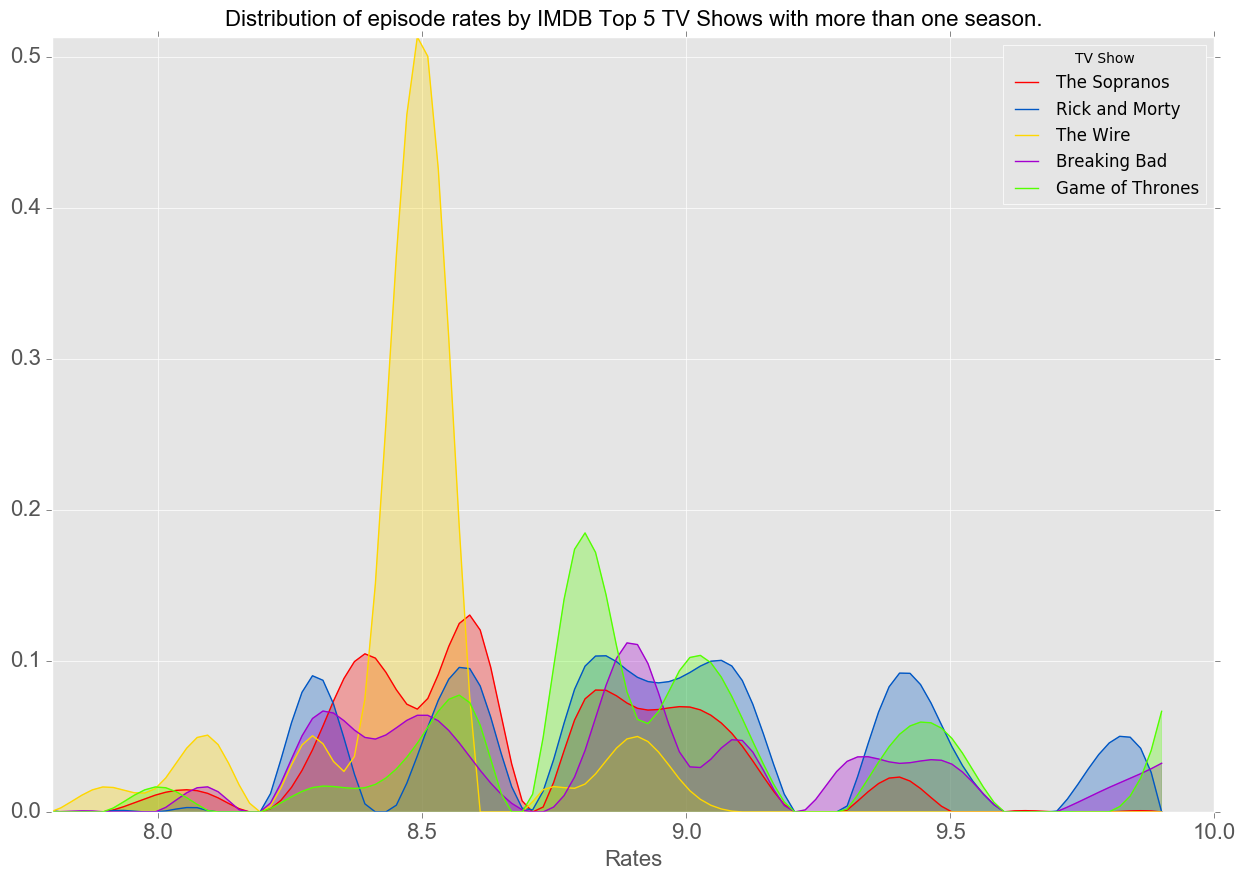

In [8]:
plt.rcParams['figure.figsize'] = (15, 10)
fig = plt.figure()
ax_1 = fig.add_subplot(111)

y_max = 0
for key in shows:
    # we need the scores as an independent variable, so we reset the index and sort by the score.
    show = df.loc[key].reset_index().sort_values(by="score")
    
    # smoothing the curve because reasons
    x_smooth = np.linspace(show.min()['score'], show.max()['score'], 500)
    y_smooth = spline(show['score'], show['distribution'], x_smooth)
    
    # y_smooth ends with negative values (which doesn't exist in the real dataset), so I erased them.
    y_smooth = [y if y > 0 else 0 for y in y_smooth]
    ax_1.plot(x_smooth, y_smooth, label=key, color=colors[key])
    ax_1.fill_between(x_smooth, y_smooth, color=colors[key], alpha=0.3)
    
    if max(y_smooth) > y_max:
        y_max = max(y_smooth)

plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.ylim(0, y_max)
plt.xlim(x_min, 10)
plt.title("Distribution of episode rates by IMDB Top 5 TV Shows with more than one season.", **title_font)
plt.xlabel("Rates", **axis_font)
plt.legend(title="TV Show")
plt.savefig("plot.png", format="png", dpi=300)
plt.show()

8.0


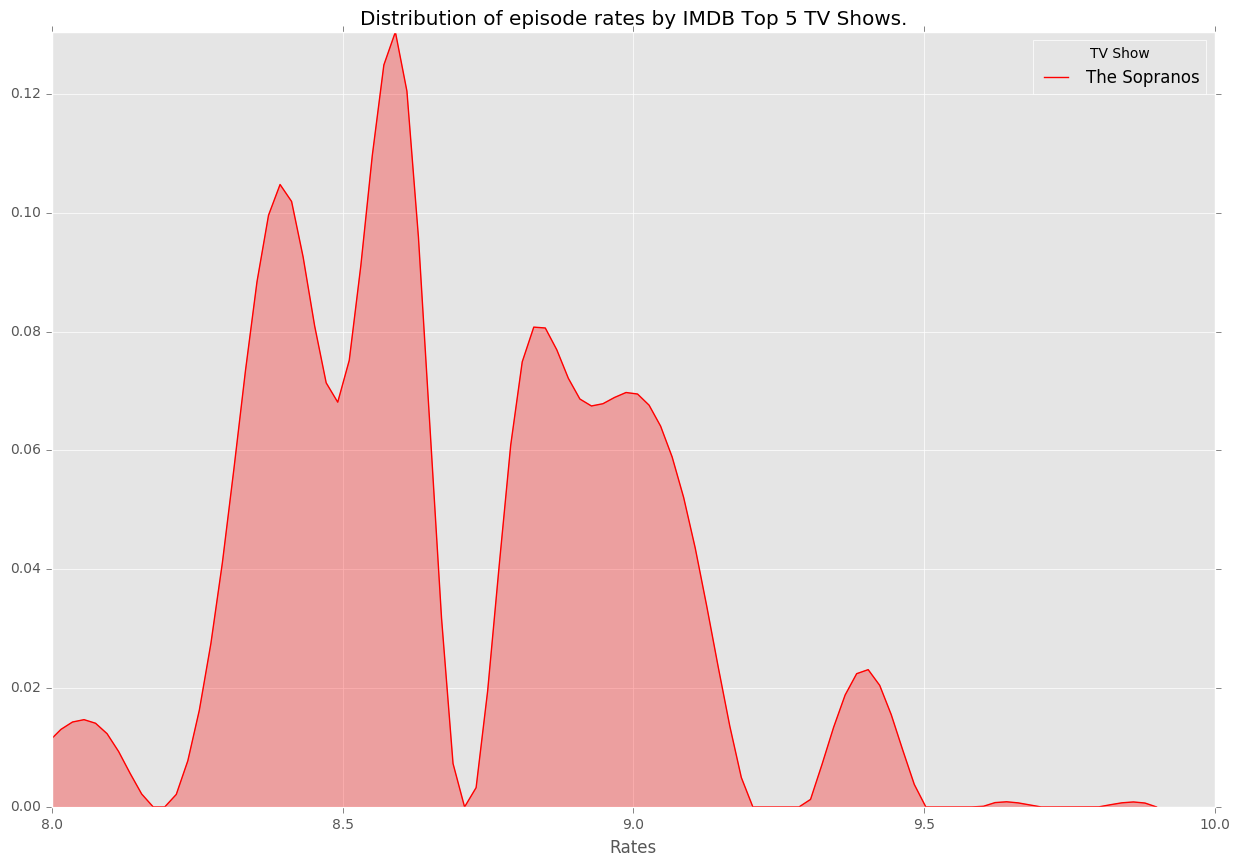

7.7


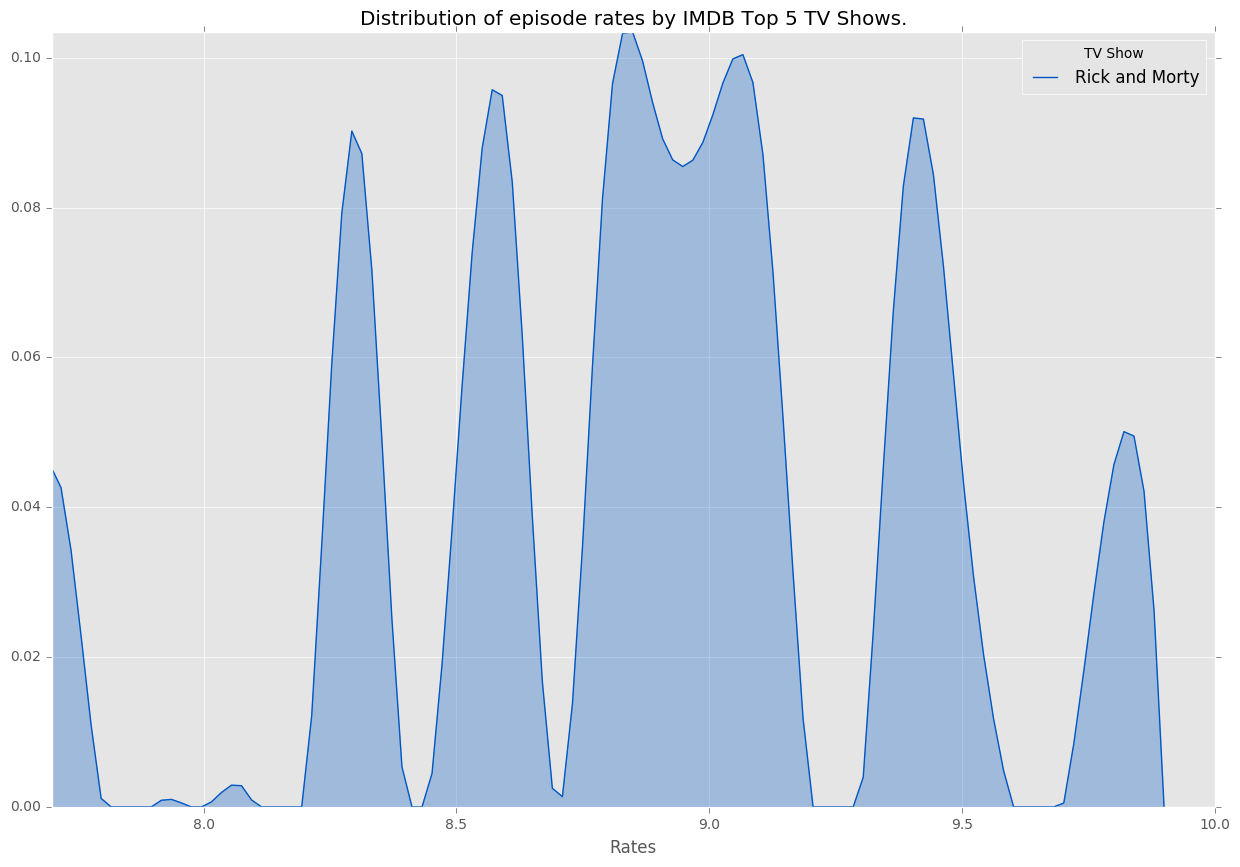

7.9


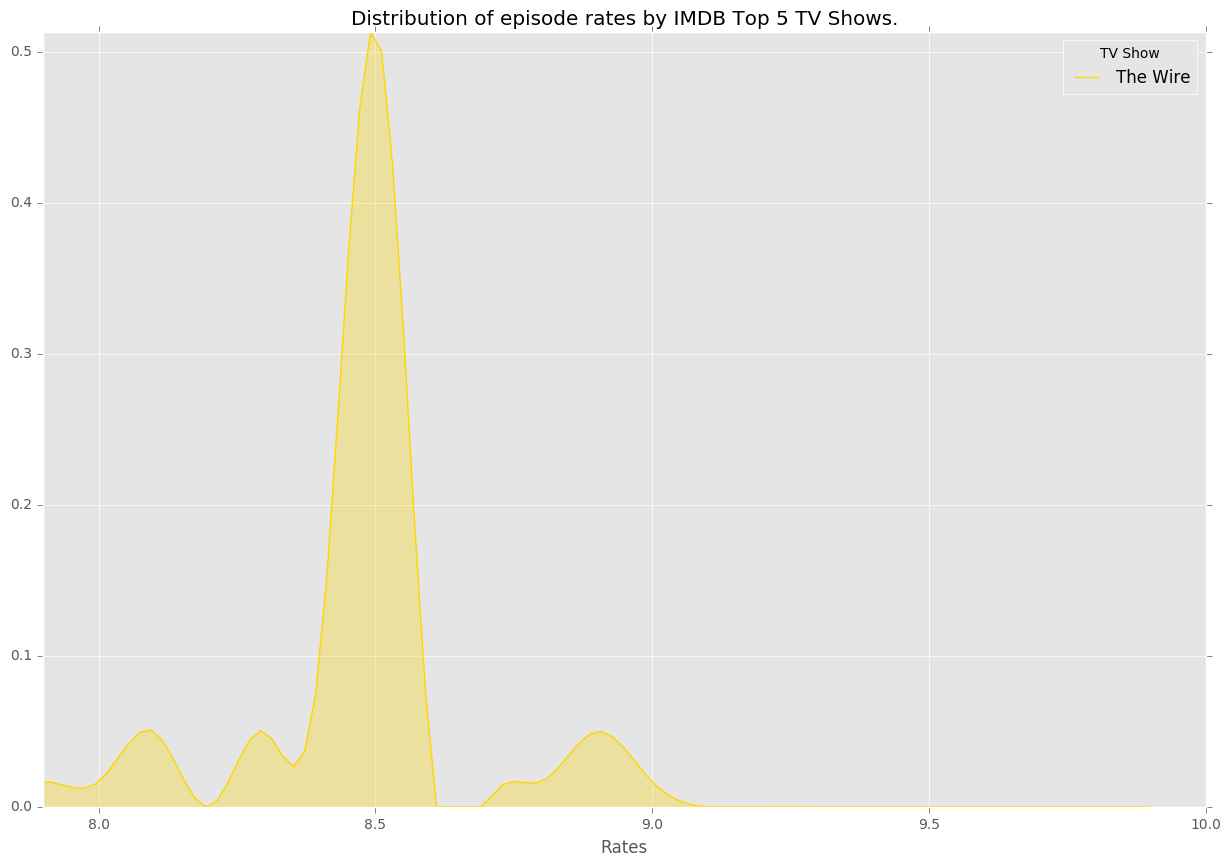

8.1


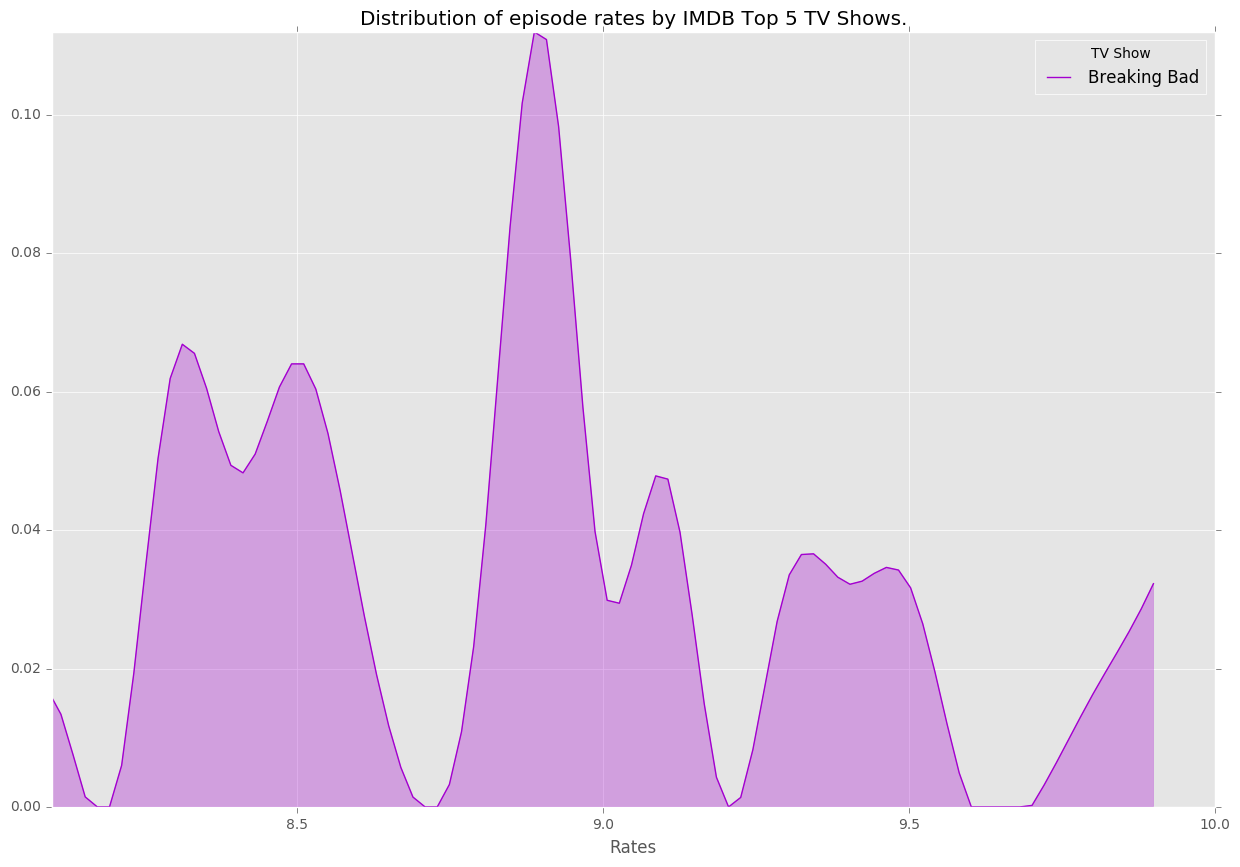

8.0


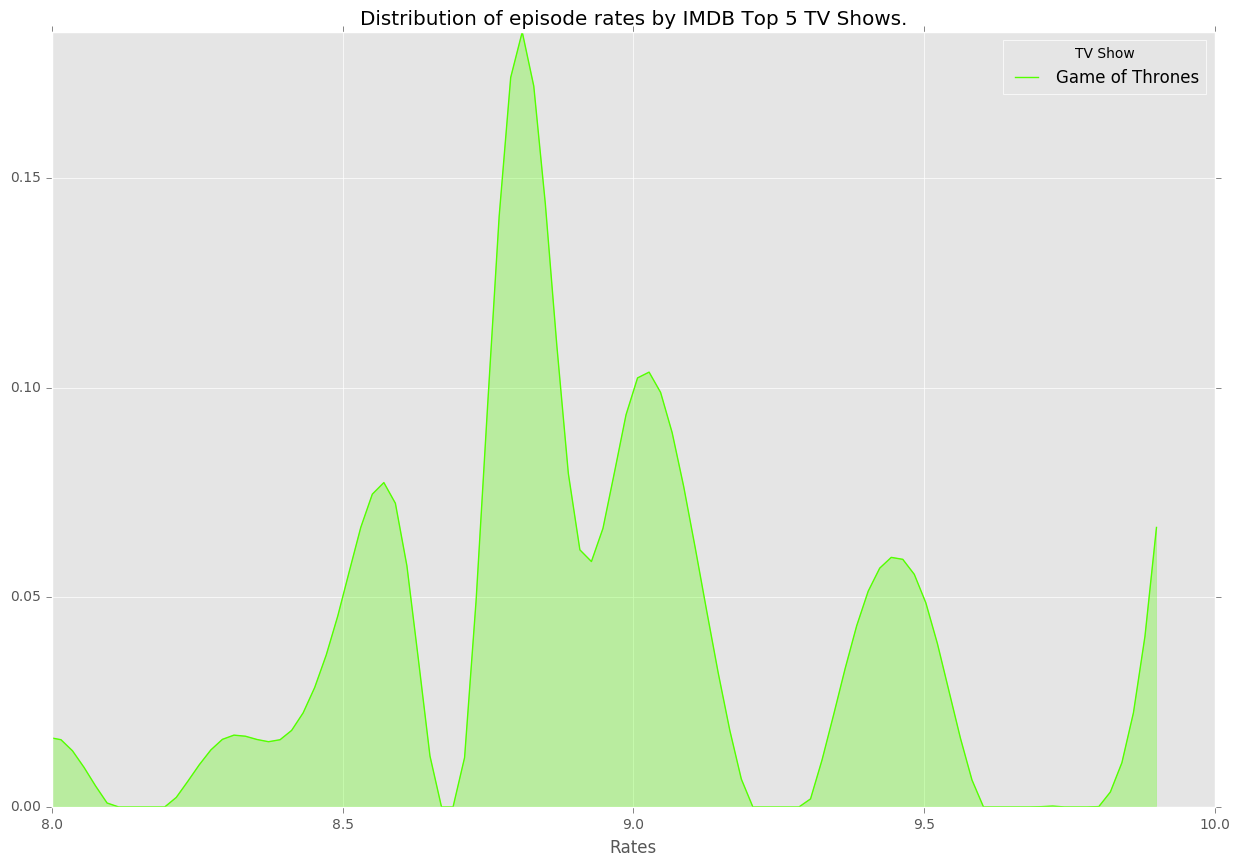

In [9]:
plt.rcParams['figure.figsize'] = (15, 10)


for key in shows:
    fig = plt.figure()
    ax_1 = fig.add_subplot(111)
    # we need the scores as an independent variable, so we reset the index and sort by the score.
    x_min = min([score if df.loc[(key, score)]['count'] > 0 else float("infinity") for score in df.loc[key].index])
    print(x_min)
    show = df.loc[key].reset_index().sort_values(by="score")
    
    # smoothing the curve because reasons
    x_smooth = np.linspace(show.min()['score'], show.max()['score'], 500)
    y_smooth = spline(show['score'], show['distribution'], x_smooth)
    
    # y_smooth ends with negative values (which doesn't exist in the real dataset), so I erased them.
    y_smooth = [y if y > 0 else 0 for y in y_smooth]
    ax_1.plot(x_smooth, y_smooth, label=key, color=colors[key])
    ax_1.fill_between(x_smooth, y_smooth, color=colors[key], alpha=0.3)

    plt.ylim(0, max(y_smooth))
    plt.xlim(x_min, 10)
    plt.title("Distribution of episode rates by IMDB Top 5 TV Shows.")
    plt.xlabel("Rates")
    plt.legend(title="TV Show")
    plt.savefig("out/%s.png" % key, format="png", dpi=300)
    plt.show()
